# Analysis

In [1]:
import os
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf
from IPython.display import display, Audio

## Metadata

In [2]:
metadata = pd.read_csv('../data/binaural_musdb18/metadata.csv', index_col=0)

In [3]:
STEMS = list(metadata['source'].unique())

## SPAUQ: Spatial Audio Quality Evaluation

In [4]:
OUTLIERS = False
FIG_SIZE = (8, 4)

### Data

In [5]:
ht_standard_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_htdemucs_ft_standard.csv')
ht_random_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_htdemucs_ft_random.csv')
ht_stereo_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_htdemucs_ft_stereo.csv')

h_standard_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-21_hdemucs_v3_standard.csv')
h_random_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-21_hdemucs_v3_random.csv')
h_stereo_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-21_hdemucs_v3_stereo.csv')

spleet_standard_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_spleeter_standard.csv')
spleet_random_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_spleeter_random.csv')
spleet_stereo_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_spleeter_stereo.csv')

umx_standard_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-24_umxhq_standard.csv')
umx_random_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-24_umxhq_random.csv')
umx_stereo_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_umxhq_stereo.csv')

In [6]:
ht_standard_df['dataset'] = 'htdemucs_standard'
ht_random_df['dataset'] = 'htdemucs_random'
ht_stereo_df['dataset'] = 'htdemucs_stereo'

h_standard_df['dataset'] = 'hdemucs_v3_standard'
h_random_df['dataset'] = 'hdemucs_v3_random'
h_stereo_df['dataset'] = 'hdemucs_v3_stereo'

spleet_standard_df['dataset'] = 'spleeter_standard'
spleet_random_df['dataset'] = 'spleeter_random'
spleet_stereo_df['dataset'] = 'spleeter_stereo'

umx_standard_df['dataset'] = 'umxhq_standard'
umx_random_df['dataset'] = 'umxhq_random'
umx_stereo_df['dataset'] = 'umxhq_stereo'

In [7]:
hdemucs_df = pd.concat([h_standard_df, h_random_df, h_stereo_df], ignore_index=True)
htdemucs_df = pd.concat([ht_standard_df, ht_random_df, ht_stereo_df], ignore_index=True)
spleet_df = pd.concat([spleet_standard_df, spleet_random_df, spleet_stereo_df], ignore_index=True)
umx_df = pd.concat([umx_standard_df, umx_random_df, umx_stereo_df], ignore_index=True)

In [8]:
all_models = pd.concat([hdemucs_df, htdemucs_df, umx_df], ignore_index=True)

### By Model

#### H Demucs V3

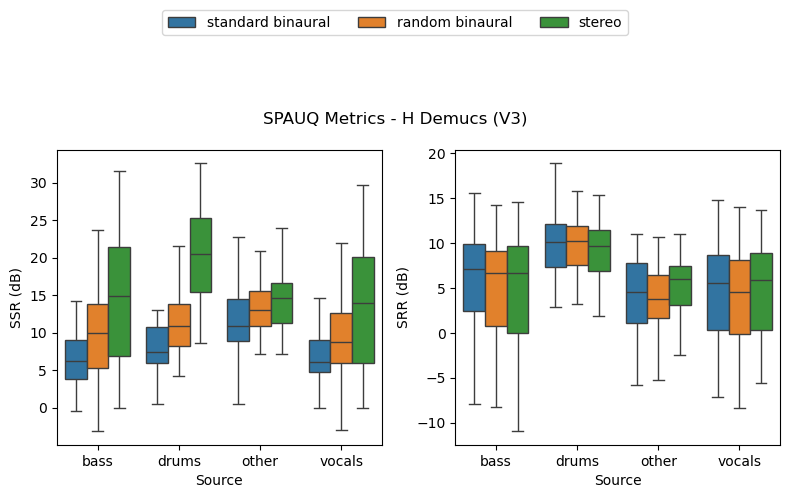

In [9]:
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE, tight_layout=True)
sns.boxplot(x='source', y='SSR', hue='dataset', data=hdemucs_df, ax=axs[0], showfliers=OUTLIERS)
sns.boxplot(x='source', y='SRR', hue='dataset', data=hdemucs_df, ax=axs[1], showfliers=OUTLIERS)

axs[0].set(ylabel='SSR (dB)', xlabel='Source')
axs[1].set(ylabel='SRR (dB)', xlabel='Source')

h, l = axs[0].get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

for a in axs:
    a.legend().remove()

fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.25))

fig.suptitle("SPAUQ Metrics - H Demucs (V3)")
# plt.savefig('../data/eval/plots/spauq_hdemucs_v3.pdf', bbox_inches='tight')
plt.show()

In [10]:
# hdemucs_df[hdemucs_df['SSR'] == 0].groupby('dataset').source.value_counts()

#### HT Demucs FT

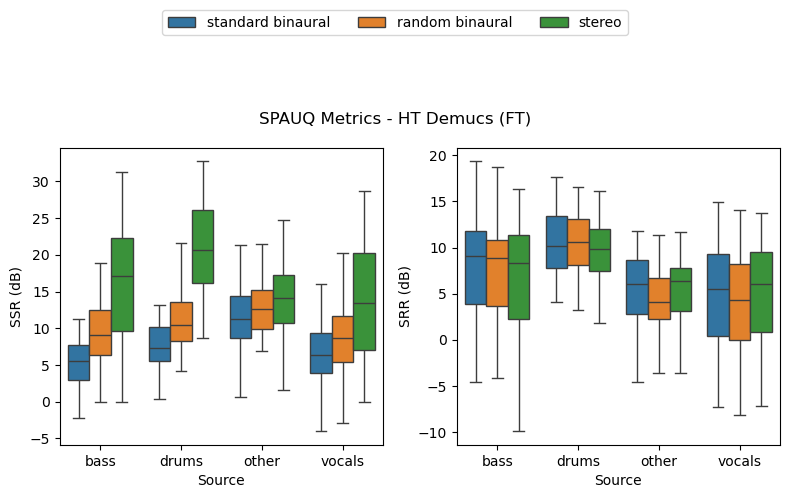

In [11]:
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE, tight_layout=True)
sns.boxplot(x='source', y='SSR', hue='dataset', data=htdemucs_df, ax=axs[0], showfliers=OUTLIERS)
sns.boxplot(x='source', y='SRR', hue='dataset', data=htdemucs_df, ax=axs[1], showfliers=OUTLIERS)

axs[0].set(ylabel='SSR (dB)', xlabel='Source')
axs[1].set(ylabel='SRR (dB)', xlabel='Source')

h, l = axs[0].get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

for a in axs:
    a.legend().remove()

fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.25))

fig.suptitle("SPAUQ Metrics - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/spauq_htdemucs_ft.pdf', bbox_inches='tight')
plt.show()

In [12]:
# htdemucs_df[htdemucs_df['SSR'] == 0].groupby('dataset').source.value_counts()

#### Spleeter

In [13]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)
# sns.boxplot(x='source', y='SSR', hue='dataset', data=temp_df, ax=axs[0])
# sns.boxplot(x='source', y='SRR', hue='dataset', data=temp_df, ax=axs[1])

# axs[0].set(ylabel='SSR (dB)', xlabel='Source')
# axs[1].set(ylabel='SRR (dB)', xlabel='Source')

# # axs[0].set_ylim([-0.1, 0.1])

# h, l = axs[0].get_legend_handles_labels()
# # l = ['standard binaural', 'random binaural', 'stereo']

# for a in axs:
#     a.legend().remove()

# fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.25))

# fig.suptitle("SPAUQ Metrics - Spleeter")
# # plt.savefig('../data/eval/plots/spauq_htdemucs_ft.pdf', bbox_inches='tight')
# plt.show()

In [14]:
# spleet_df[spleet_df['SSR'] == 0].groupby('dataset').source.value_counts()

#### Open-Unmix

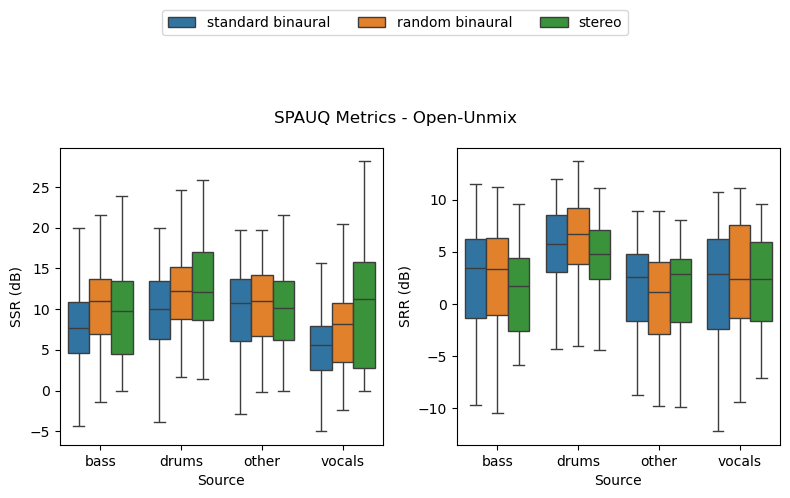

In [15]:
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE, tight_layout=True)
sns.boxplot(x='source', y='SSR', hue='dataset', data=umx_df, ax=axs[0], showfliers=OUTLIERS)
sns.boxplot(x='source', y='SRR', hue='dataset', data=umx_df, ax=axs[1], showfliers=OUTLIERS)

axs[0].set(ylabel='SSR (dB)', xlabel='Source')
axs[1].set(ylabel='SRR (dB)', xlabel='Source')

h, l = axs[0].get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

for a in axs:
    a.legend().remove()

fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.25))

fig.suptitle("SPAUQ Metrics - Open-Unmix")
# plt.savefig('../data/eval/plots/spauq_htdemucs_ft.pdf', bbox_inches='tight')
plt.show()

In [16]:
# umx_df[umx_df['SSR'] == 0].groupby('dataset').source.value_counts()

### By Source

In [17]:
all_models['model'] = all_models['dataset'].apply(lambda x: x.split('_')[0])
all_models['dataset'] = all_models['dataset'].apply(lambda x: x.split('_')[-1])

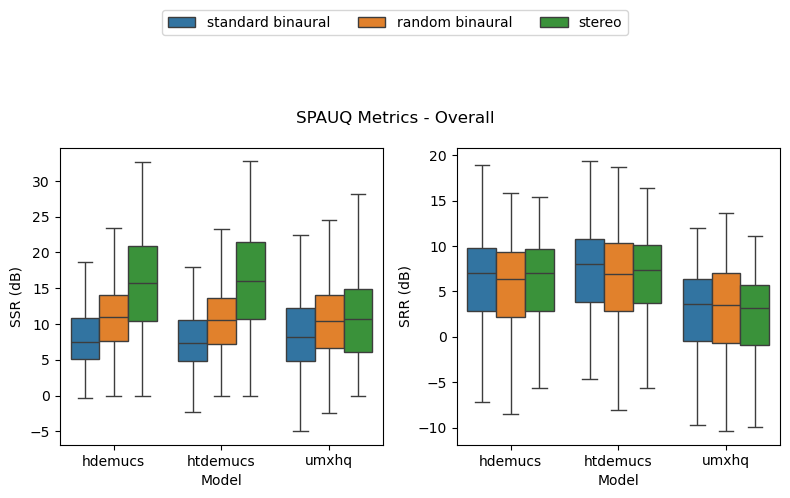

In [18]:
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE, tight_layout=True)
sns.boxplot(x='model', y='SSR', hue='dataset', data=all_models, ax=axs[0], showfliers=OUTLIERS)
sns.boxplot(x='model', y='SRR', hue='dataset', data=all_models, ax=axs[1], showfliers=OUTLIERS)

axs[0].set(ylabel='SSR (dB)', xlabel='Model')
axs[1].set(ylabel='SRR (dB)', xlabel='Model')

h, l = axs[0].get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

for a in axs:
    a.legend().remove()

fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.25))

fig.suptitle("SPAUQ Metrics - Overall")
# plt.savefig('../data/eval/plots/spauq_hdemucs_v3.pdf', bbox_inches='tight')
plt.show()

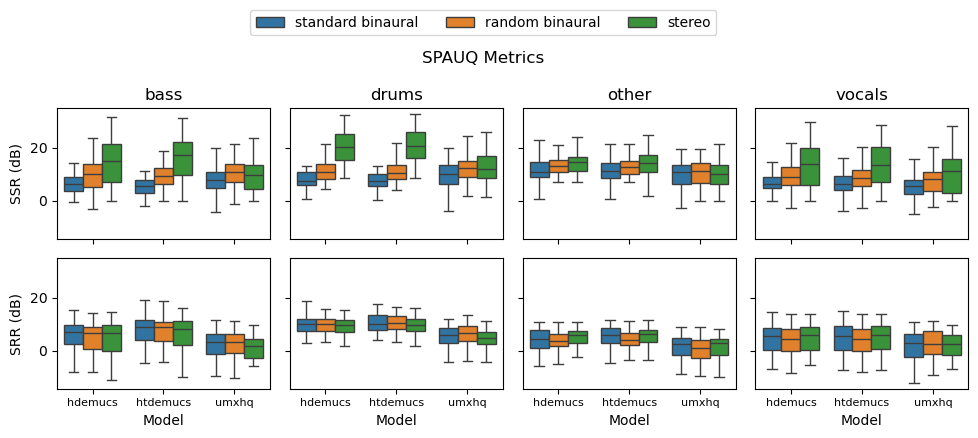

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(10, 4), tight_layout=True, sharex=True, sharey=True)

x_labels = ['hdemucs', 'htdemucs', 'umxhq']

for i in range(len(STEMS)):
    stem_df = all_models[all_models['source'] == STEMS[i]]
    
    sns.boxplot(x='model', y='SSR', hue='dataset', data=stem_df, ax=axs[0][i], showfliers=OUTLIERS)
    sns.boxplot(x='model', y='SRR', hue='dataset', data=stem_df, ax=axs[1][i], showfliers=OUTLIERS)
    
    axs[0][i].set(ylabel='SSR (dB)', xlabel='Model')
    axs[1][i].set(ylabel='SRR (dB)', xlabel='Model')
    axs[0][i].set_title(STEMS[i])

    axs[1][i].set_xticks(x_labels)
    axs[1][i].set_xticklabels(x_labels, fontsize=8)

h, l = axs[0][0].get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

for ax in axs.flatten():
    ax.legend().remove()

fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("SPAUQ Metrics")
# # plt.savefig('../data/eval/plots/spauq_hdemucs_v3.pdf', bbox_inches='tight')
plt.show()

### By Angle

In [20]:
OUTLIERS = False

In [21]:
metadata.rename(columns={'standard_angle': 'standard', 'random_angle': 'random'}, inplace=True)

In [22]:
metadata = metadata.melt(id_vars=['title', 'source'], var_name='dataset', value_name='angle')

In [23]:
merged_df = pd.merge(metadata, all_models, how='inner')
b = np.arange(-90, 91, 30)
merged_df['bins'] = pd.cut(merged_df['angle'], bins=b)

#### H Demucs V3

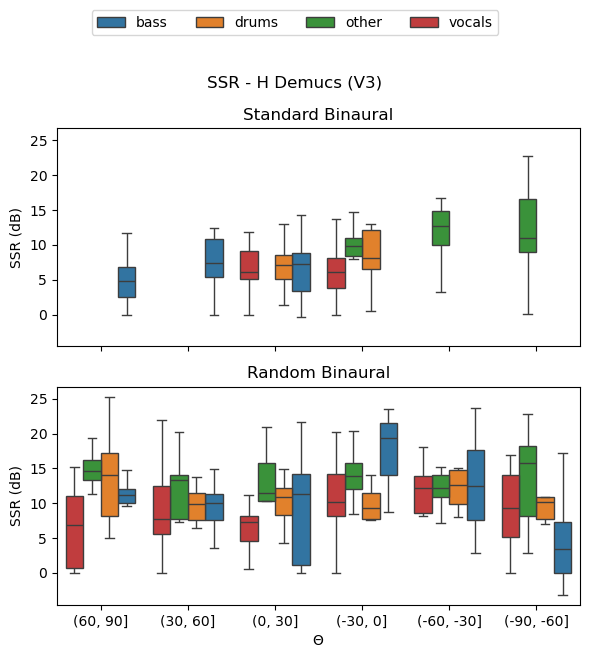

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), tight_layout=True, sharex=True, sharey=True)

plot_data = merged_df[merged_df['model'] == 'hdemucs']

sns.boxplot(x='bins', y='SSR', hue='source', data=plot_data[plot_data['dataset'] == 'standard'], ax=ax[0], showfliers=OUTLIERS)
sns.boxplot(x='bins', y='SSR', hue='source', data=plot_data[plot_data['dataset'] == 'random'], ax=ax[1], showfliers=OUTLIERS)

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='SSR (dB)', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='SSR (dB)', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("SSR - H Demucs (V3)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

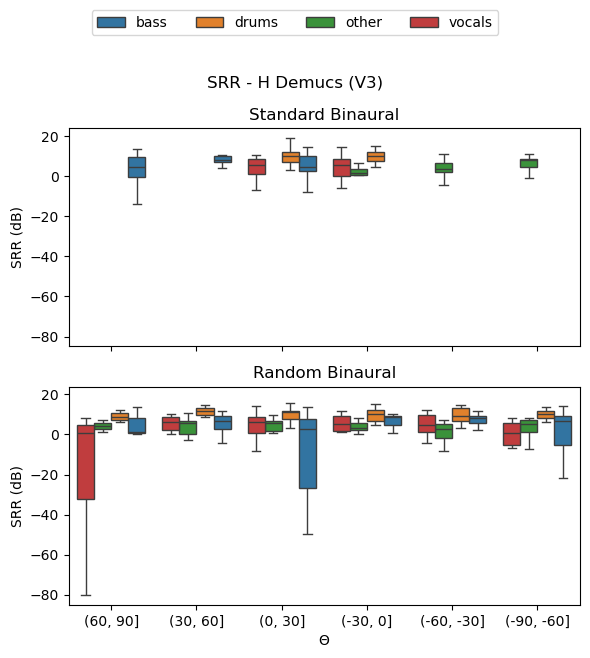

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), tight_layout=True, sharex=True, sharey=True)

plot_data = merged_df[merged_df['model'] == 'hdemucs']

sns.boxplot(x='bins', y='SRR', hue='source', data=plot_data[plot_data['dataset'] == 'standard'], ax=ax[0], showfliers=OUTLIERS)
sns.boxplot(x='bins', y='SRR', hue='source', data=plot_data[plot_data['dataset'] == 'random'], ax=ax[1], showfliers=OUTLIERS)

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='SRR (dB)', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='SRR (dB)', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("SRR - H Demucs (V3)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Hybrid T Demucs (FT)

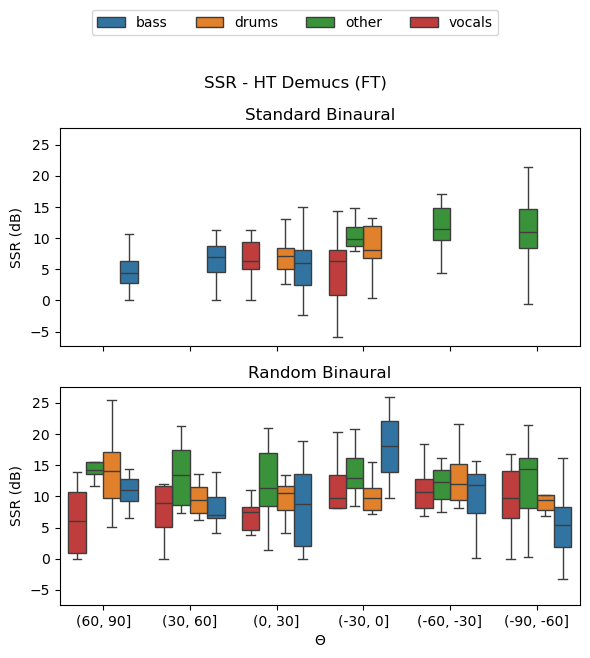

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), tight_layout=True, sharex=True, sharey=True)

plot_data = merged_df[merged_df['model'] == 'htdemucs']

sns.boxplot(x='bins', y='SSR', hue='source', data=plot_data[plot_data['dataset'] == 'standard'], ax=ax[0], showfliers=OUTLIERS)
sns.boxplot(x='bins', y='SSR', hue='source', data=plot_data[plot_data['dataset'] == 'random'], ax=ax[1], showfliers=OUTLIERS)

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='SSR (dB)', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='SSR (dB)', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("SSR - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

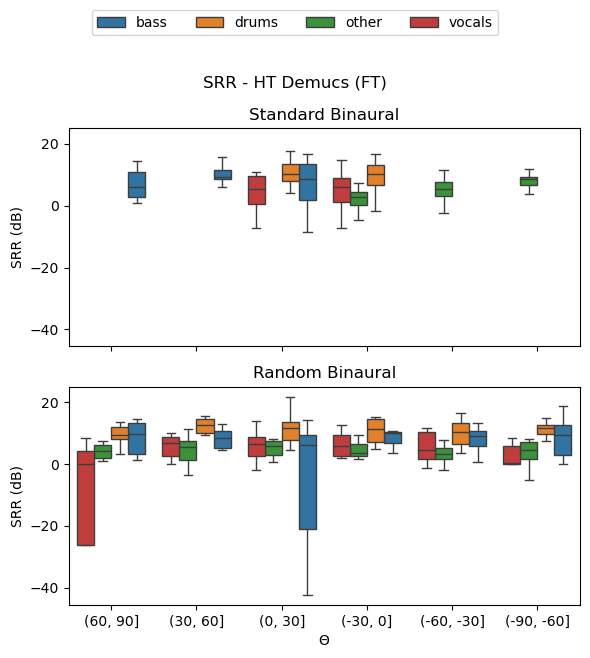

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), tight_layout=True, sharex=True, sharey=True)

plot_data = merged_df[merged_df['model'] == 'htdemucs']

sns.boxplot(x='bins', y='SRR', hue='source', data=plot_data[plot_data['dataset'] == 'standard'], ax=ax[0], showfliers=OUTLIERS)
sns.boxplot(x='bins', y='SRR', hue='source', data=plot_data[plot_data['dataset'] == 'random'], ax=ax[1], showfliers=OUTLIERS)

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='SRR (dB)', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='SRR (dB)', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("SRR - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Spleeter

#### Open-Unmix

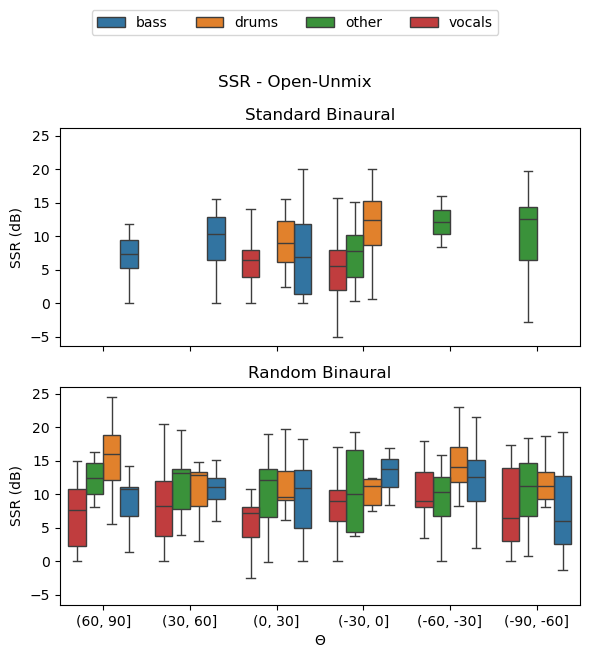

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), tight_layout=True, sharex=True, sharey=True)

plot_data = merged_df[merged_df['model'] == 'umxhq']

sns.boxplot(x='bins', y='SSR', hue='source', data=plot_data[plot_data['dataset'] == 'standard'], ax=ax[0], showfliers=OUTLIERS)
sns.boxplot(x='bins', y='SSR', hue='source', data=plot_data[plot_data['dataset'] == 'random'], ax=ax[1], showfliers=OUTLIERS)

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='SSR (dB)', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='SSR (dB)', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("SSR - Open-Unmix")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

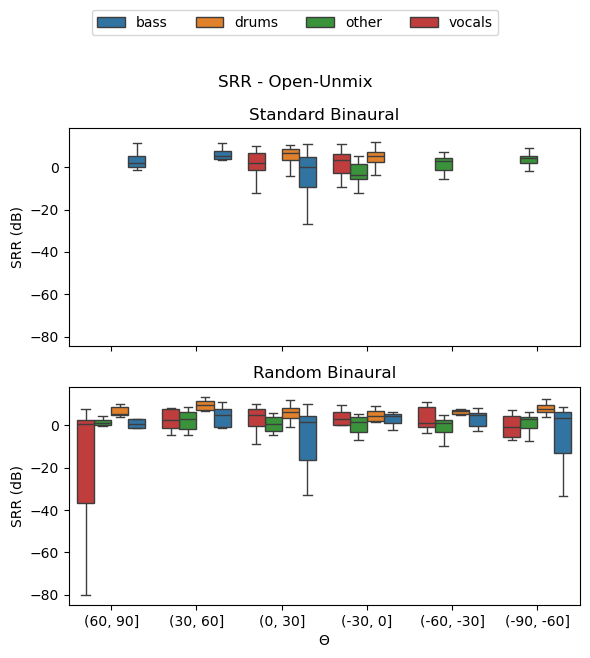

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), tight_layout=True, sharex=True, sharey=True)

plot_data = merged_df[merged_df['model'] == 'umxhq']

sns.boxplot(x='bins', y='SRR', hue='source', data=plot_data[plot_data['dataset'] == 'standard'], ax=ax[0], showfliers=OUTLIERS)
sns.boxplot(x='bins', y='SRR', hue='source', data=plot_data[plot_data['dataset'] == 'random'], ax=ax[1], showfliers=OUTLIERS)

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='SRR (dB)', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='SRR (dB)', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("SRR - Open-Unmix")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

## ITD / ILD Data

In [30]:
ht_standard_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_htdemucs_ft_standard.csv')
ht_random_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_htdemucs_ft_random.csv')
ht_stereo_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_htdemucs_ft_stereo.csv')

h_standard_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_hdemucs_v3_standard.csv')
h_random_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_hdemucs_v3_random.csv')
h_stereo_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_hdemucs_v3_stereo.csv')

spleet_standard_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_spleeter_standard.csv')
spleet_random_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_spleeter_random.csv')
spleet_stereo_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_spleeter_stereo.csv')

umx_standard_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_umxhq_stereo.csv')
umx_random_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_umxhq_random.csv')
umx_stereo_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_umxhq_stereo.csv')

In [31]:
ht_standard_df['dataset'] = 'standard'
ht_random_df['dataset'] = 'random'
ht_stereo_df['dataset'] = 'stereo'

h_standard_df['dataset'] = 'standard'
h_random_df['dataset'] = 'random'
h_stereo_df['dataset'] = 'stereo'

spleet_standard_df['dataset'] = 'standard'
spleet_random_df['dataset'] = 'random'
spleet_stereo_df['dataset'] = 'stereo'

umx_standard_df['dataset'] = 'standard'
umx_random_df['dataset'] = 'random'
umx_stereo_df['dataset'] = 'stereo'

In [32]:
hdemucs_df = pd.concat([h_standard_df, h_random_df, h_stereo_df], ignore_index=True)
htdemucs_df = pd.concat([ht_standard_df, ht_random_df, ht_stereo_df], ignore_index=True)
spleet_df = pd.concat([spleet_standard_df, spleet_random_df, spleet_stereo_df], ignore_index=True)
umx_df = pd.concat([umx_standard_df, umx_random_df, umx_stereo_df], ignore_index=True)

In [33]:
hdemucs_df['diff_ITD_microsec'] = hdemucs_df['diff_ITD'] * 1e6
htdemucs_df['diff_ITD_microsec'] = htdemucs_df['diff_ITD'] * 1e6
spleet_df['diff_ITD_microsec'] = spleet_df['diff_ITD'] * 1e6
umx_df['diff_ITD_microsec'] = umx_df['diff_ITD'] * 1e6

### Interaural Time Difference (ITD)

In [34]:
SHOW_FLIERS_ITD = False
SHOW_FLIERS_ILD = False

#### H Demucs V3

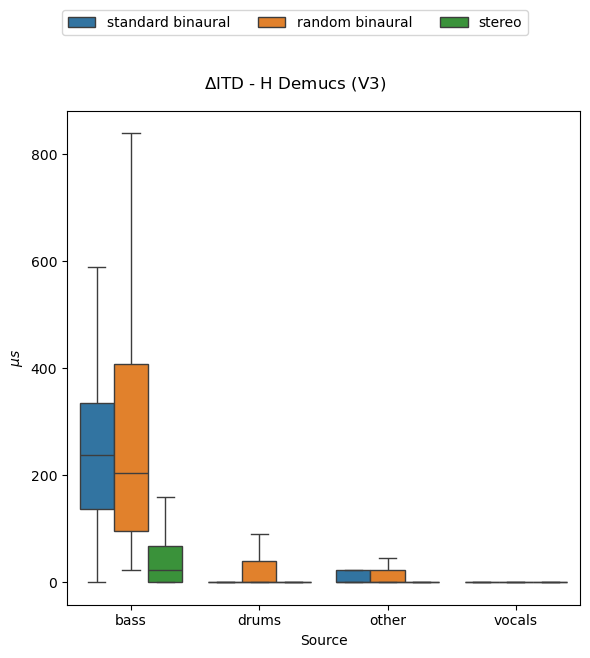

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ITD_microsec', hue='dataset', data=hdemucs_df, ax=ax, showfliers=SHOW_FLIERS_ITD)

# ax.set_ylim([-100, 1000])

h, l = ax.get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

ax.legend().remove()
ax.set(ylabel='$\mu s$', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - H Demucs (V3)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### HT Demucs FT

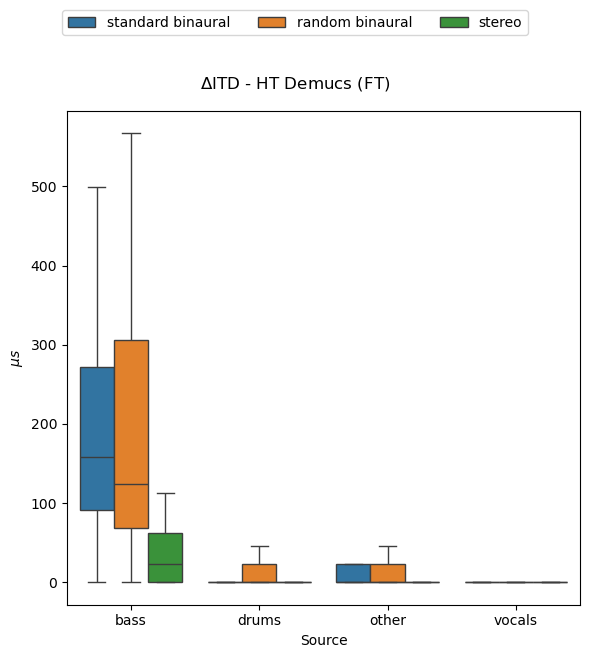

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ITD_microsec', hue='dataset', data=htdemucs_df, ax=ax, showfliers=SHOW_FLIERS_ITD)

# ax.set_ylim([-100, 1000])

h, l = ax.get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

ax.legend().remove()
ax.set(ylabel='$\mu s$', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Spleeter

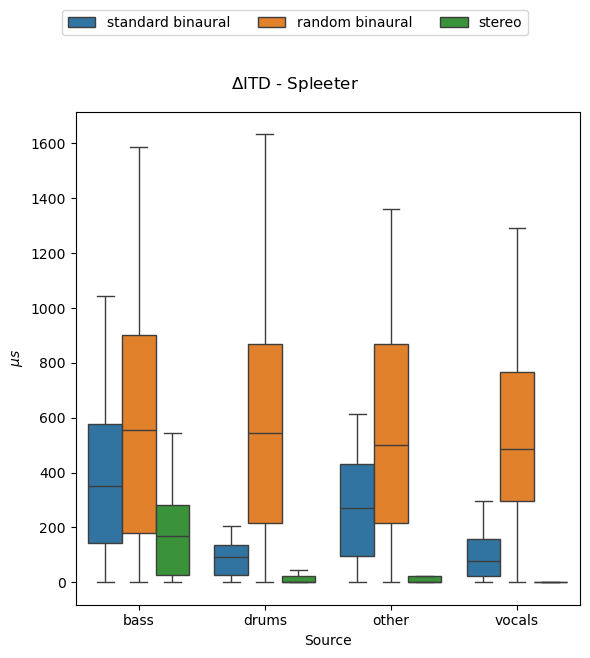

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ITD_microsec', hue='dataset', data=spleet_df, ax=ax, showfliers=SHOW_FLIERS_ITD)

# ax.set_ylim([-100, 2000])

h, l = ax.get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

ax.legend().remove()
ax.set(ylabel='$\mu s$', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - Spleeter")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Open-Unmix

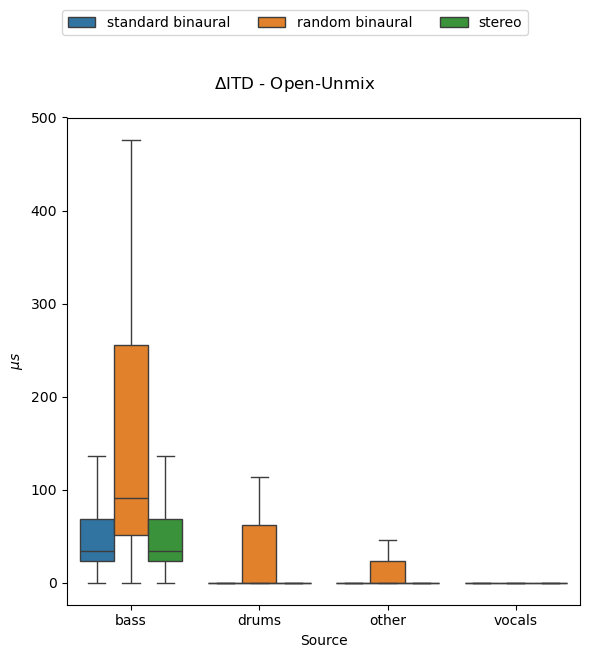

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ITD_microsec', hue='dataset', data=umx_df, ax=ax, showfliers=SHOW_FLIERS_ITD)

# ax.set_ylim([-100, 1250])

h, l = ax.get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

ax.legend().remove()
ax.set(ylabel='$\mu s$', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - Open-Unmix")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

### Interaural Level Difference (ILD)

#### H Demucs V3

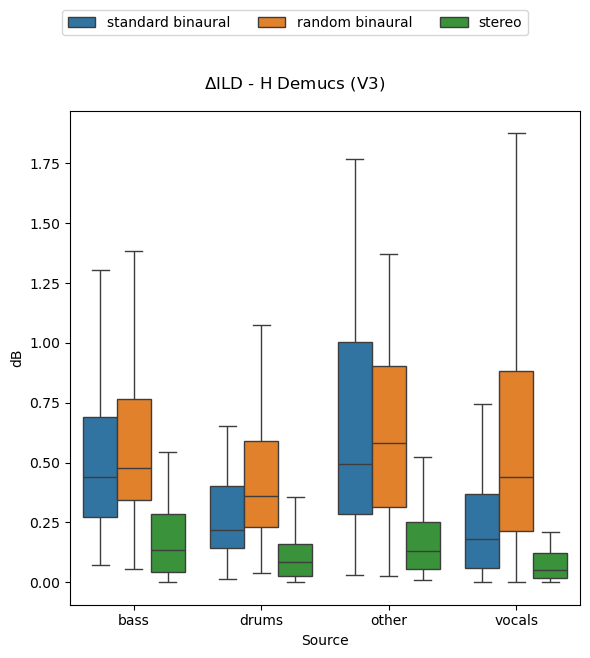

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ILD', hue='dataset', data=hdemucs_df, ax=ax, showfliers=SHOW_FLIERS_ILD)

h, l = ax.get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

ax.legend().remove()
ax.set(ylabel='dB', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - H Demucs (V3)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### HT Demucs FT

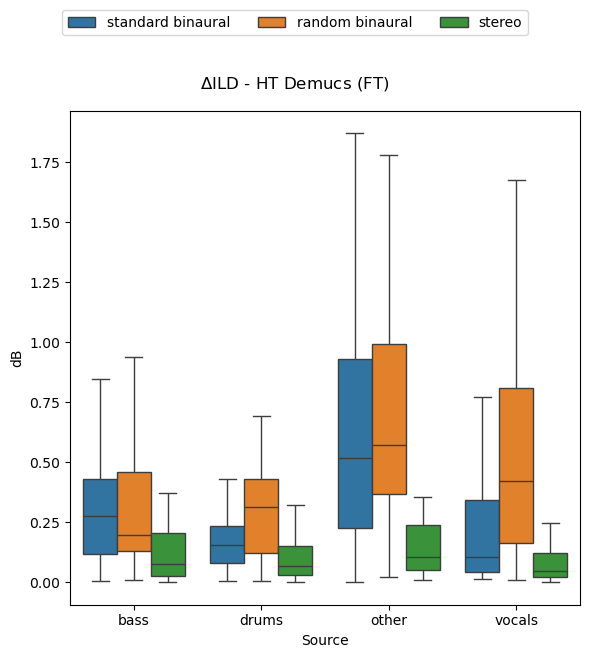

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ILD', hue='dataset', data=htdemucs_df, ax=ax, showfliers=SHOW_FLIERS_ILD)

h, l = ax.get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

ax.legend().remove()
ax.set(ylabel='dB', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Spleeter

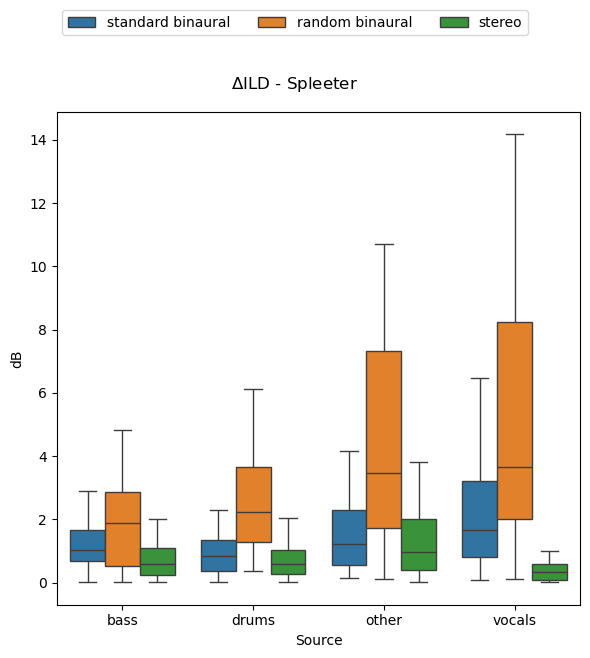

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ILD', hue='dataset', data=spleet_df, ax=ax, showfliers=SHOW_FLIERS_ILD)

h, l = ax.get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

ax.legend().remove()
ax.set(ylabel='dB', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - Spleeter")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Open-Unmix

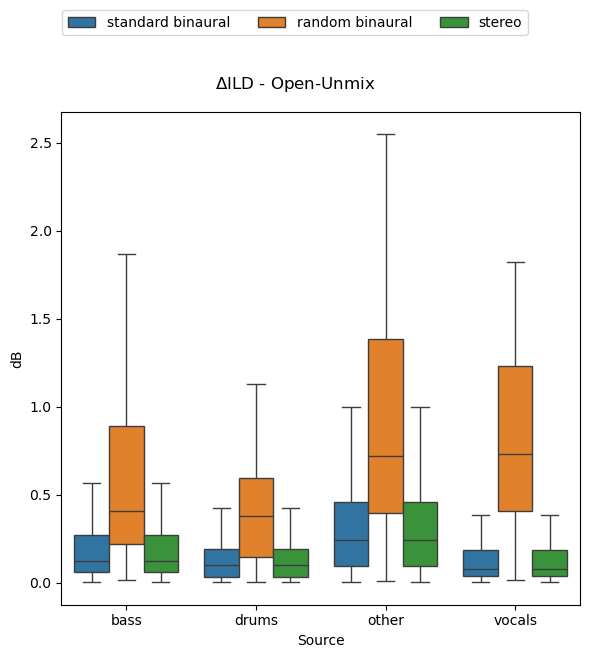

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

box = sns.boxplot(x='source', y='diff_ILD', hue='dataset', data=umx_df, ax=ax, showfliers=SHOW_FLIERS_ILD)

# ax.set_ylim([-0.5, 8])

h, l = ax.get_legend_handles_labels()
l = ['standard binaural', 'random binaural', 'stereo']

ax.legend().remove()
ax.set(ylabel='dB', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - Open-Unmix")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

### By Angle

In [43]:
metadata = pd.read_csv('../data/binaural_musdb18/metadata.csv', index_col=0)
metadata.rename(columns={'standard_angle': 'standard', 'random_angle': 'random'}, inplace=True)

In [44]:
metadata = metadata.melt(id_vars=['title', 'source'], var_name='dataset', value_name='angle')

#### H Demucs V3

In [45]:
merged_df = pd.merge(metadata, hdemucs_df, how='inner')
b = np.arange(-90, 91, 30)
merged_df['bins'] = pd.cut(merged_df['angle'], bins=b)

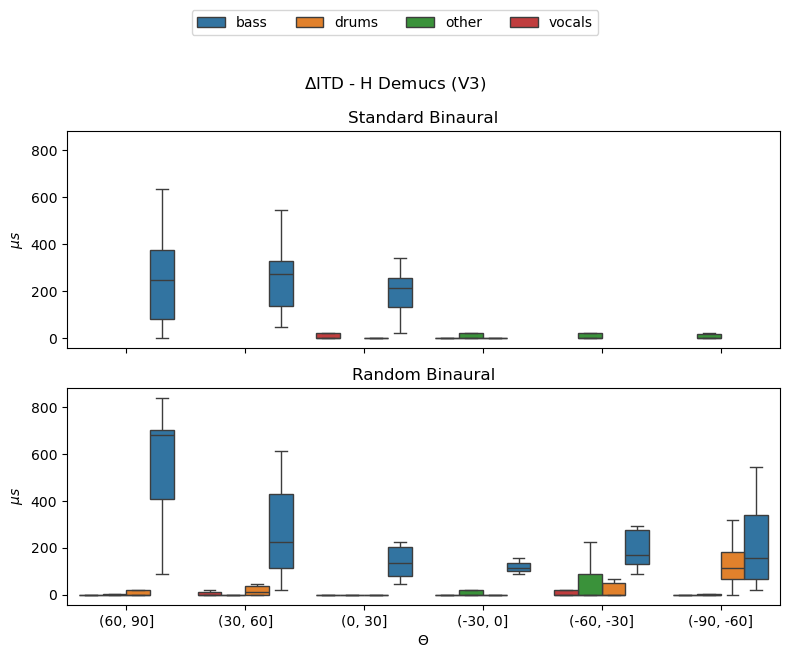

In [46]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True, sharex=True, sharey=True)

sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0], showfliers=False)
sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1], showfliers=False)

# ax[0].set_ylim([-50, 800])

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - H Demucs (V3)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

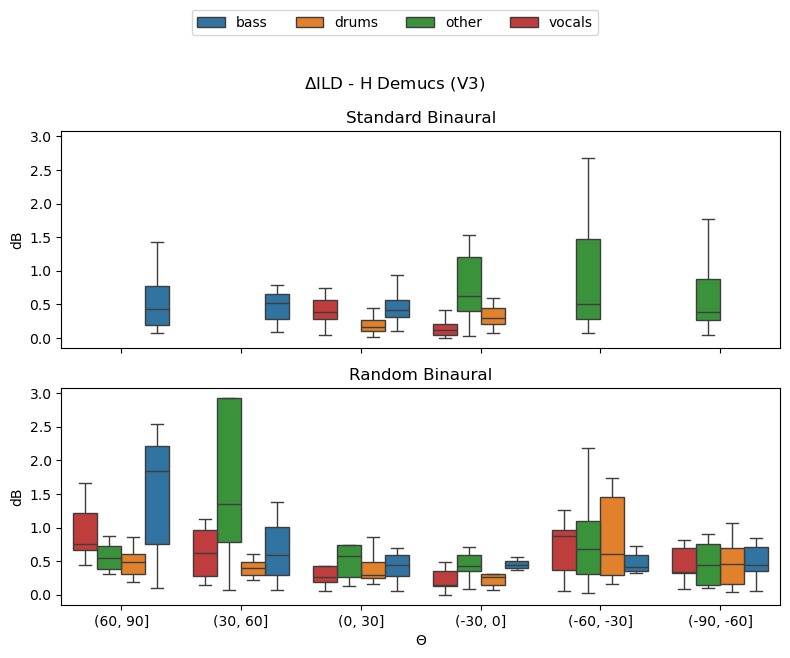

In [47]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True, sharex=True, sharey=True)

sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0], showfliers=False)
sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1], showfliers=False)

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='dB', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='dB', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - H Demucs (V3)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Hybrid T Demucs (FT)

In [48]:
merged_df = pd.merge(metadata, htdemucs_df, how='inner')
b = np.arange(-90, 91, 30)
merged_df['bins'] = pd.cut(merged_df['angle'], bins=b)

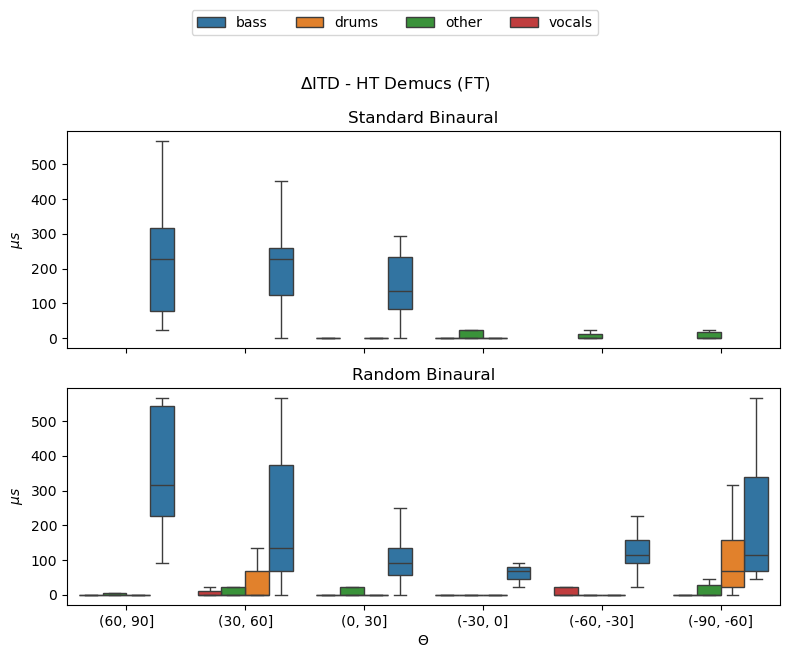

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True, sharex=True, sharey=True)

sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0], showfliers=False)
sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1], showfliers=False)

# ax[0].set_ylim([-50, 800])

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

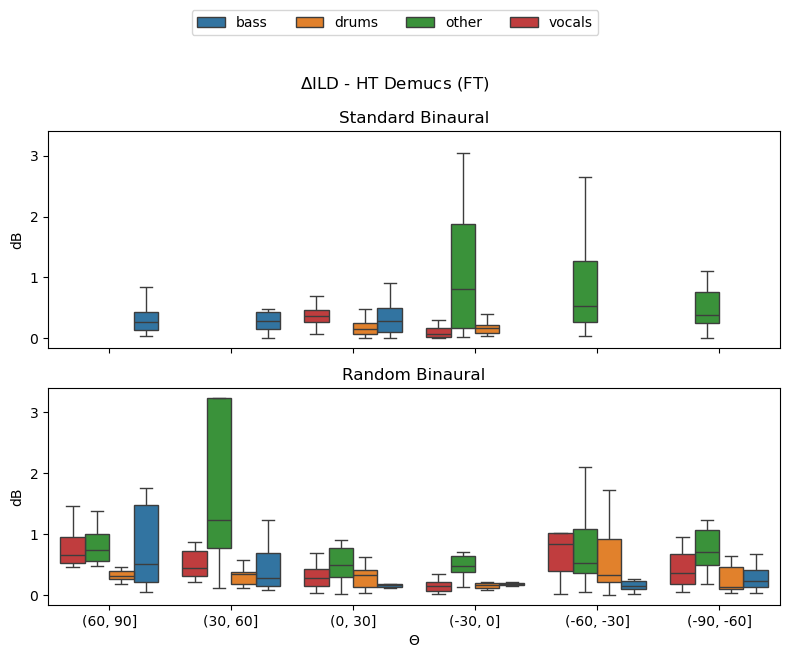

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True, sharex=True, sharey=True)

sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0], showfliers=False)
sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1], showfliers=False)

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='dB', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='dB', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Spleeter

In [51]:
merged_df = pd.merge(metadata, spleet_df, how='inner')
b = np.arange(-90, 91, 30)
merged_df['bins'] = pd.cut(merged_df['angle'], bins=b)

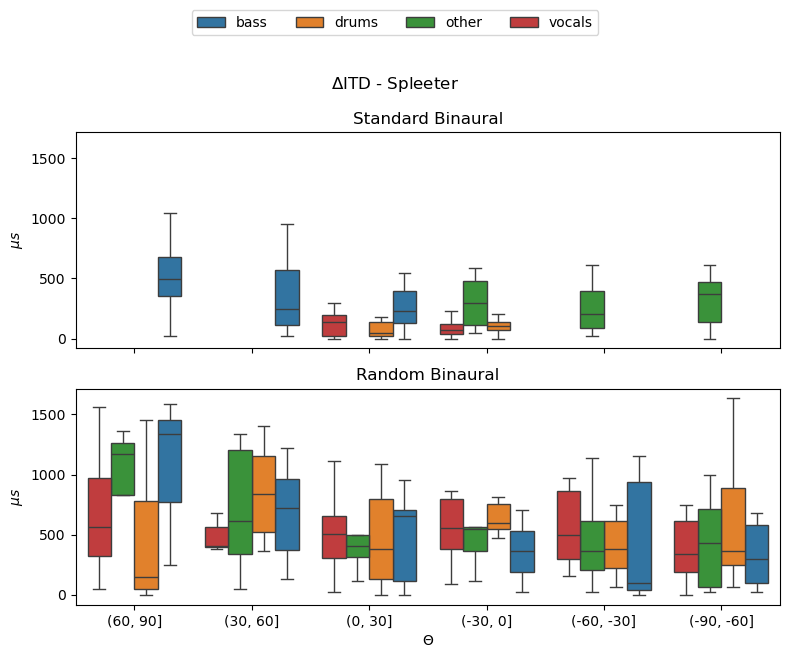

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True, sharex=True, sharey=True)

sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0], showfliers=False)
sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1], showfliers=False)

# ax[0].set_ylim([-50, 800])

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - Spleeter")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

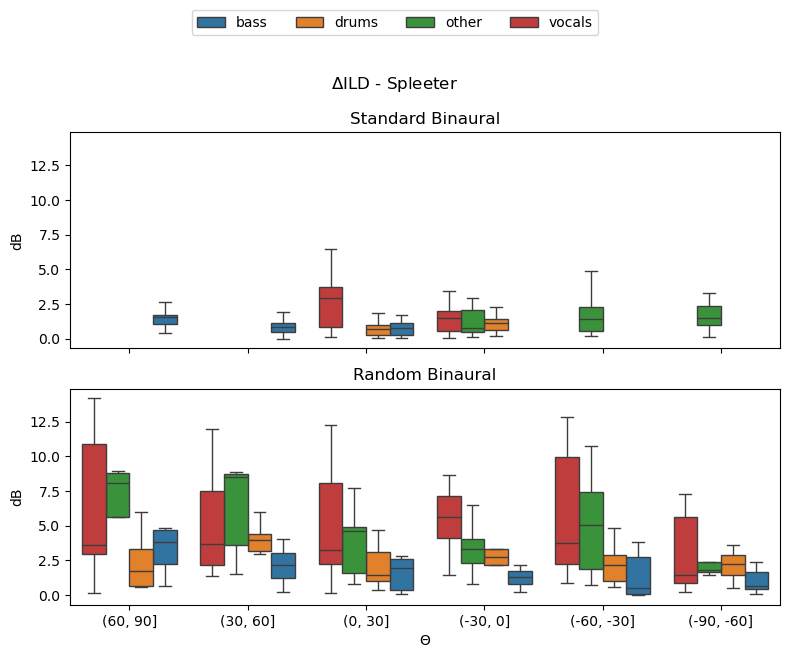

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True, sharex=True, sharey=True)

sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0], showfliers=False)
sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1], showfliers=False)

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='dB', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='dB', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - Spleeter")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Open-Unmix

In [54]:
merged_df = pd.merge(metadata, umx_df, how='inner')
b = np.arange(-90, 91, 30)
merged_df['bins'] = pd.cut(merged_df['angle'], bins=b)

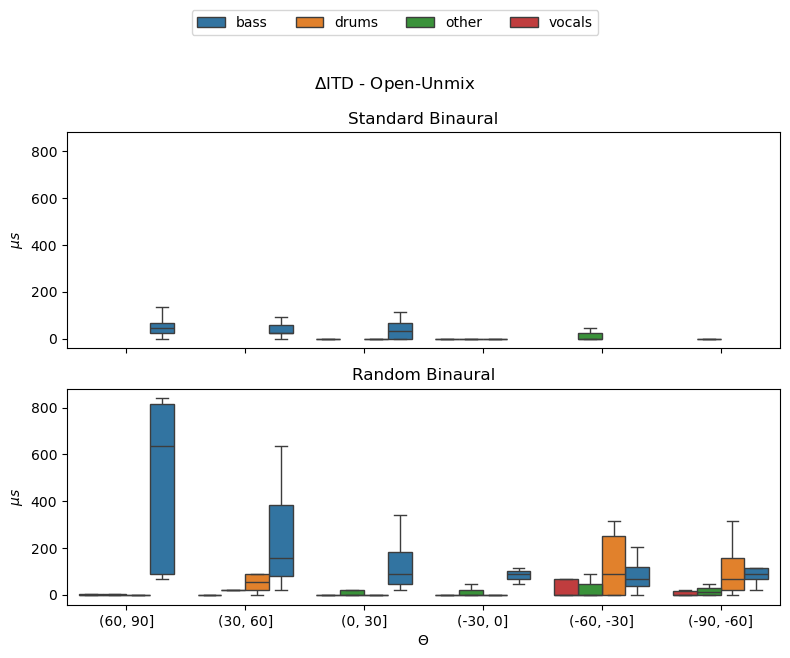

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True, sharex=True, sharey=True)

sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0], showfliers=False)
sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1], showfliers=False)

# ax[0].set_ylim([-50, 800])

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - Open-Unmix")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

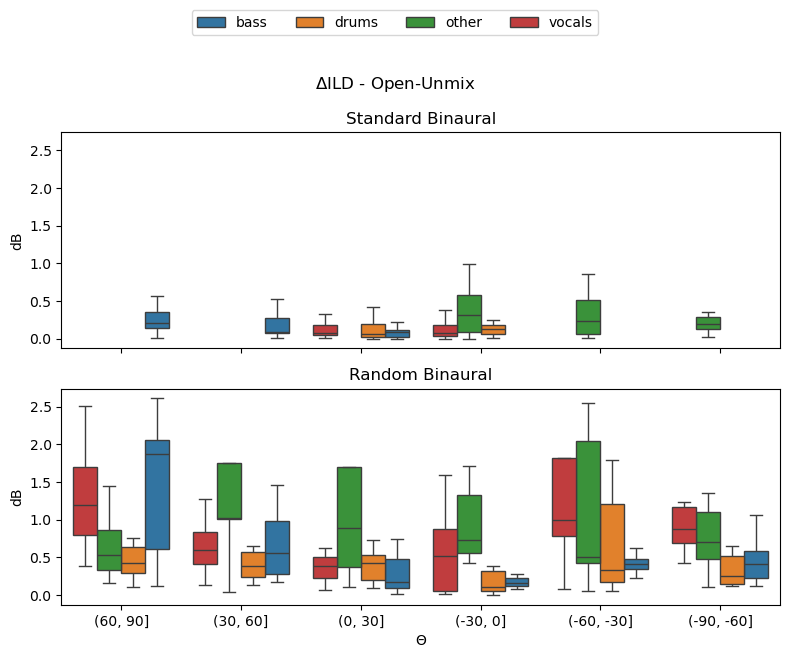

In [56]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True, sharex=True, sharey=True)

sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0], showfliers=False)
sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1], showfliers=False)

h, l = ax[0].get_legend_handles_labels()
ax[1].invert_xaxis()

for a in ax:
    a.legend().remove()

ax[0].set(ylabel='dB', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='dB', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - Open-Unmix")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()